# Reduced units 

$\epsilon / k_b = 162.8 K$, $\sigma = 3.627 \AA$

Reduced units: $T^* = 0.694$, $\rho^*_l = 0.84$

## (a) Triple point formulas
$$
T = 0.69 \epsilon / k_b \quad \rho_l = 0.845 \sigma^3
$$

## (b) Reduced units converted to SI
$T = T^* \epsilon / k_b = 136.172 K$, $\rho_l = \rho^*_l \sigma^3 = 3.91251 \, 1/m^3$

In [5]:
0.84 * 162.8, 0.82 * (3.627e-10)**3

(136.752, 3.9125195364059994e-29)

# Monte Carlo acceptance rules

## The metropolis acceptance probability

Using the metropolis acceptance probability, $p_{acc} = \min(1, \exp(-\beta \Delta U))$, where $\Delta U = U_{y} - U_{x}$, the following holds.

If $U(y) < U(x)$, then $\exp(-\beta \Delta U) > 1$, and $p_{acc} = 1$. **Thus, the move is always accepted.**

## Using the symmetric acceptance probability

now, lets use the symmetric acceptance probability, $p_{acc} = \frac{1}{1 + \exp(\beta \Delta U)}$. If the system loweres its energy, $\Delta U < 0$, then if $\beta \Delta U \ll 1$, then $p_{acc} \approx 1$. So, if the change in energy is small, the move has high acceptance probability. 


# Programming a Monte Carlo simulation

The system contains one particle, and the potential is given by the equation 
$$ U(r) = x^4 + 3x^3 - 2.5x. $$

## (a) Implementing the Monte Carlo simulation

The code is given below.



In [17]:
from scipy import constants as const
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('scandic')


/var/folders/xk/1__wtv4d77dg6j4_ypxwxc6m0000gp/T/ipykernel_14076/1082230093.py:21: RuntimeWarning: overflow encountered in exp
  acceptance_probability = np.exp(-(new_energy - current_energy))


Estimated Particle Position: -1.7261397846989002


Text(1, 0, 'Iteration')

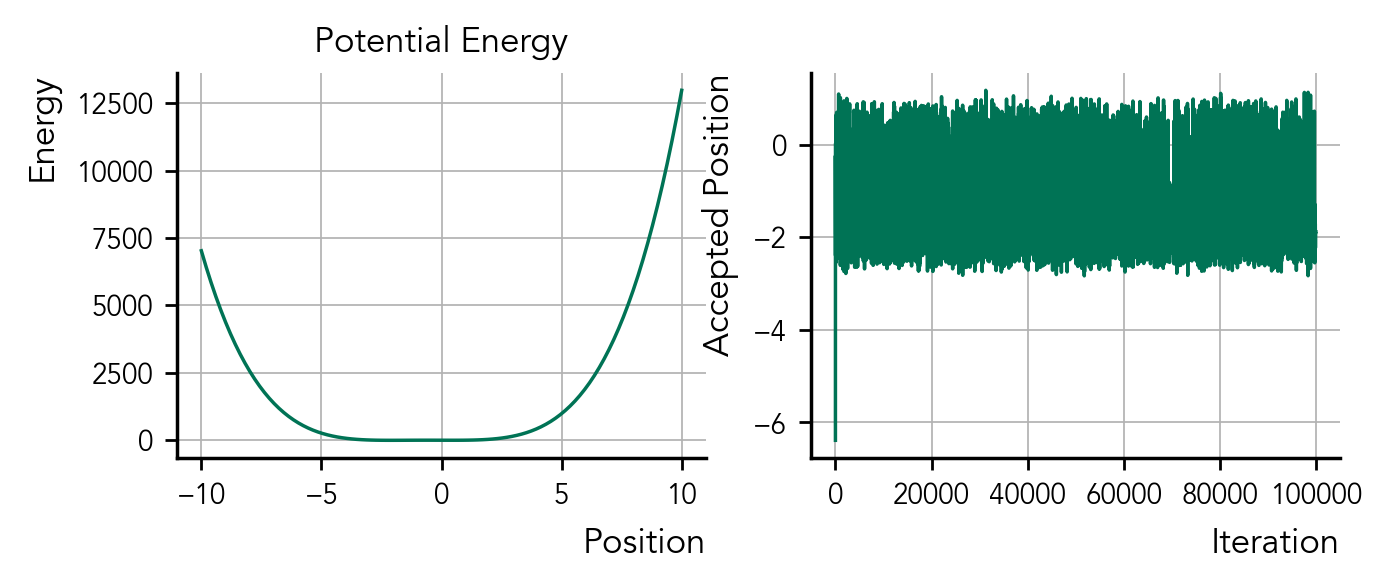

In [26]:
def potential_energy(x):
    return x**4 + 3*x**3 - 2.5*x

def monte_carlo_simulation(num_iterations, displacement_range):
    # Initialize the particle position randomly within the given range
    current_position = np.random.uniform(*displacement_range)
    accepted_positions = []
    
    for _ in range(num_iterations):
        # Calculate the potential energy at the current position
        current_energy = potential_energy(current_position)
        
        # Choose a random displacement for the particle position
        displacement = np.random.uniform(*displacement_range)
        
        # Calculate the potential energy at the new position
        new_position = current_position + displacement
        new_energy = potential_energy(new_position)
        
        # Calculate the acceptance probability
        acceptance_probability = np.exp(-(new_energy - current_energy))
        
        # Accept or reject the new position based on the acceptance probability
        if np.random.rand() <= acceptance_probability:
            current_position = new_position
        
        # Store the accepted position
        accepted_positions.append(current_position)
    
    # Estimate the particle position by averaging the accepted positions
    estimated_position = np.mean(accepted_positions)
    return estimated_position, accepted_positions

# Example usage
num_iterations = 100000  # Adjust the number of iterations as needed
displacement_range = (-10, 10)  # Adjust the range of displacements as needed

estimated_position, accepted_positions = monte_carlo_simulation(num_iterations, displacement_range)
print("Estimated Particle Position:", estimated_position)

fig, ax = plt.subplots(1, 2, figsize=(6, 2))

ax[0].set_title("Potential Energy")
ax[0].set_ylabel("Energy")
ax[0].set_xlabel("Position")
x = np.linspace(*displacement_range, 100)
ax[0].plot(x, potential_energy(x))

ax[1].plot(accepted_positions)
ax[1].set_ylabel("Accepted Position")
ax[1].set_xlabel("Iteration")

In [7]:
# using monte carlo simulation of the canonical ensemble described with potential 
# $$ U(r) = x^4 + 3x^3 - 2.5x. $$




(136.752, 3.9125195364059994e-29)

In [6]:
const.Boltzmann

1.380649e-23

# 3

there is full Hamiltonian of the system -- it is just __one particle__.

In [ ]:
# 